In [1]:
from branching_model import Phylogeny

phylogeny = Phylogeny.Phylogeny(
    is_cell=False,
    learning_rate=0.3,
    baseline_growth_rate=0.22,
    resistance_cost=0.1,
    resistance_benefit=1.0,
    mutations_per_division=0.01,
)
detection_cell_count = 50000
n_timesteps_treatment = 60
phylogeny.run_simulation(detection_cell_count, n_timesteps_treatment)

growth rates: 0.19352654471993447 ± 0.0
growth rates: 0.19917219400405883 ± 0.0
growth rates: 0.20558575987815858 ± 0.0
growth rates: 0.2111269811540842 ± 0.0
growth rates: 0.2149116811446018 ± 8.016501515657776e-05
growth rates: 0.21679473626283496 ± 3.101936846753864e-05
Detected 58874 cells at timestep 60, running treatment 0
growth rates: 0.0029040662906876756 ± 2.6380462375831485e-05
growth rates: 0.0030316461268842503 ± 3.7361116348366885e-05
growth rates: 0.0031800170808002877 ± 4.76159192459585e-05
growth rates: 0.0033586079090879026 ± 5.906644617662301e-05
growth rates: 0.0035763400148462374 ± 7.263407842060737e-05
growth rates: 0.0038458021543920032 ± 9.08343938474538e-05
Ran treatment 0 for 60 timesteps
growth rates: 0.0017376860455085668 ± 7.198620059296078e-06
growth rates: 0.0017812009513778172 ± 9.505084590988805e-06
growth rates: 0.0018191156122419566 ± 1.0930066840226246e-05
growth rates: 0.0018579920366698617 ± 1.2113016642069718e-05
growth rates: 0.001901848262906227

(-4073.7000000000003, 85569.7)

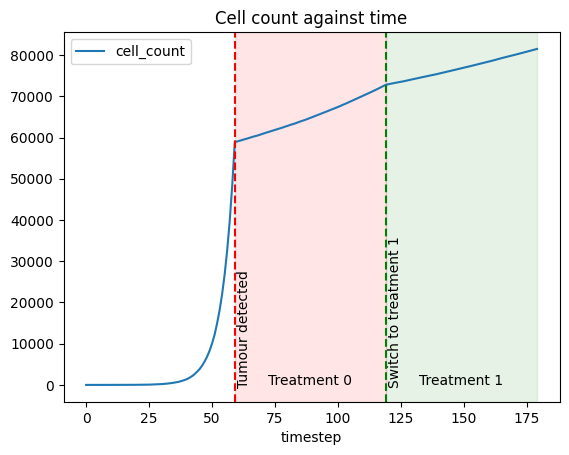

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

cell_counts = pd.read_csv("logs/cell_counts.csv")
# plot the cell counts against time
fig, ax = plt.subplots()
cell_counts.plot(x="timestep", y="cell_count", title="Cell count against time", ax=ax)
time_reached_detection = cell_counts[
    cell_counts["cell_count"] >= detection_cell_count
].iloc[0]["timestep"]
ax.axvline(x=time_reached_detection, color="red", linestyle="--")
ax.text(time_reached_detection + 1, 0, "Tumour detected", rotation=90)
ax.axvline(
    x=time_reached_detection + n_timesteps_treatment,
    color="green",
    linestyle="--",
    label="Switch to treatment 1",
)
ax.text(
    time_reached_detection + n_timesteps_treatment + 1,
    0,
    "Switch to treatment 1",
    rotation=90,
)
ax.text(
    time_reached_detection + n_timesteps_treatment / 2, 0, "Treatment 0", ha="center"
)
ax.text(
    time_reached_detection + n_timesteps_treatment + n_timesteps_treatment / 2,
    0,
    "Treatment 1",
    ha="center",
)
ylim = ax.get_ylim()
ax.fill_betweenx(
    ylim,
    time_reached_detection,
    time_reached_detection + n_timesteps_treatment,
    alpha=0.1,
    color="red",
)
ax.fill_betweenx(
    ylim,
    time_reached_detection + n_timesteps_treatment,
    time_reached_detection + n_timesteps_treatment * 2,
    alpha=0.1,
    color="green",
)
ax.set_ylim(ylim)

In [ ]:
# plot number of 

In [3]:
cell_phenotypes = pd.read_csv("logs/cell_phenotypes.csv")
cell_phenotypes

,timestep,cell_id,n_cells,susceptible,resistant_0,resistant_1
0,0,0,1,0.398331,0.283748,0.317922
1,1,0,1,0.409786,0.278474,0.311739
2,2,0,1,0.421577,0.273002,0.305421
3,3,0,1,0.433600,0.267422,0.298978
4,4,0,2,0.445950,0.261743,0.292307
...,...,...,...,...,...,...
89377,179,807,1,0.971277,0.013670,0.015053
89378,179,808,1,0.971277,0.013670,0.015053
89379,179,809,1,0.971277,0.013670,0.015053
89380,179,810,1,0.971277,0.013670,0.015053


MovieWriter imagemagick unavailable; using Pillow instead.


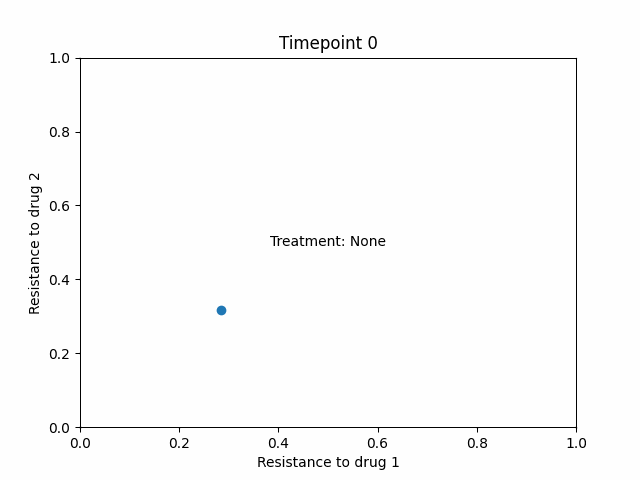

In [4]:
# animated scatter plot of resistant_0 against resistant_1 at each timepoint
import matplotlib.animation as animation

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

treatments_by_timepoint = [
    (
        None
        if timestep < time_reached_detection
        else 1
        if timestep < time_reached_detection + n_timesteps_treatment
        else 2
    )
    for timestep in cell_phenotypes["timestep"].unique()
]


def update(timepoint: int):
    ax.clear()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_title(f"Timepoint {timepoint}")
    ax.scatter(
        cell_phenotypes[cell_phenotypes["timestep"] == timepoint]["resistant_0"],
        cell_phenotypes[cell_phenotypes["timestep"] == timepoint]["resistant_1"],
    )
    ax.set_xlabel("Resistance to drug 1")
    ax.set_ylabel("Resistance to drug 2")
    ax.text(
        0.5,
        0.5,
        f"Treatment: {treatments_by_timepoint[timepoint]}",
        ha="center",
        va="center",
    )


ani = animation.FuncAnimation(fig, update, frames=cell_phenotypes["timestep"].unique())
ani.save("tests/cell_phenotypes.gif", writer="imagemagick", fps=10)
plt.close()
# show the gif
from IPython.display import Image

Image("tests/cell_phenotypes.gif")